# Plot PB2 polymerase activity assay preliminary data 



In [1]:
# import necessary modules
import sys, subprocess, glob, os, shutil, re, importlib, Bio, csv
import numpy as np
import pandas as pd
import rpy2
%load_ext rpy2.ipython

In [100]:
# read in data as dataframe 
df = pd.DataFrame.from_csv("/Users/lmoncla/Documents/Fellowships/K99/resubmission/polymerase-activity-assay-data/flow-cytometry-results/raw-data.txt",sep="\t")
df.reset_index(inplace=True)

/Users/lmoncla/anaconda/envs/LHM-basics/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [101]:
df

,Sample,293T|Count,Q1,Q2,Q3,Q4,Median,Geometric Mean,Mean,Proportion_positive
0,BioT,7850,0.013,0.013,0.000,100.0,332.0,332.0,332.0,0.000
1,GFP,7781,52.400,0.000,0.013,47.6,NaN,NaN,NaN,0.000
2,No trans control,8253,0.000,0.000,0.012,100.0,NaN,NaN,NaN,0.000
3,627K,6671,0.900,54.800,10.100,34.2,11854.0,10121.0,17865.0,0.844
4,627E,6831,0.015,21.200,42.200,36.5,1964.0,1991.0,3372.0,0.334
5,mCherry,8184,0.000,0.000,60.600,39.4,NaN,NaN,NaN,0.000


In [102]:
figure_name = "percent-positive.pdf"

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]


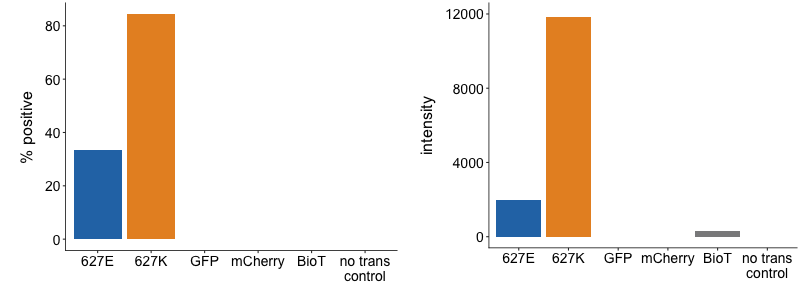

In [108]:
%%R -w 800 -h 300 -u px -i df,figure_name  # this sets the size of the plot...otherwise, it will go off the page
require(ggplot2)
library(ggplot2)
require(grid)
library(grid)
require(gridExtra)

df$Sample = gsub("No trans control","no trans\ncontrol", df$Sample)
df$Sample = factor(df$Sample, levels=c("627E","627K", "GFP", "mCherry","BioT","no trans\ncontrol"))

p1 <- ggplot(data=df, aes(x=Sample, y=Proportion_positive * 100, fill=Sample)) + 
    geom_col() +
#     scale_x_continuous(limits=c(2008, 2018), breaks=c(2008,2010,2012,2014,2016,2018))+ 
#     scale_y_continuous(limits=c(0,0.3))+
    scale_fill_manual(values=c("627K" = "#E89129", "627E" = "#2876B4", "GFP"="#8B8B8C", "mCherry"="#8B8B8C","BioT"="#8B8B8C","no trans\ncontrol"="#8B8B8C"), guide=FALSE)+
    labs(x="",y="% positive")+
    theme(plot.title = element_text(size=20, hjust=0.5))+
    theme(panel.grid.major.y=element_line(colour=NA))+
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(strip.text.x=element_text(size=116))+
    theme(axis.title.y=element_text(size=16, vjust=4))+
    theme(axis.title.x=element_text(size=16, vjust=-3))+
    theme(axis.text=element_text(size=14, colour="black"))+
    #theme(axis.text.x=element_text(size=12))+
    theme(legend.text=element_text(size=16))+
    theme(legend.title=element_text(size=16, face="plain"))+
    theme(panel.margin=unit(1, "lines"))+theme(plot.margin=unit(c(0.1,0.1,0.01,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))


p2 <- ggplot(data=df, aes(x=Sample, y=Median, fill=Sample)) + 
    geom_col() +
    scale_y_continuous(limits=c(0,12000), breaks=seq(0,12000,4000))+
    scale_fill_manual(values=c("627K" = "#E89129", "627E" = "#2876B4", "GFP"="#8B8B8C", "mCherry"="#8B8B8C","BioT"="#8B8B8C","no trans\ncontrol"="#8B8B8C"), guide=FALSE)+
    labs(x="",y="intensity")+
    theme(plot.title = element_text(size=20, hjust=0.5))+
    theme(panel.grid.major.y=element_line(colour=NA))+
    theme(panel.grid.minor=element_line(colour=NA,size=NA))+    
    theme(strip.background = element_rect(colour=NA, fill=NA))+
    theme(axis.line.x=element_line(colour="black"))+
    theme(axis.line.y=element_line(colour="black"))+
    theme(strip.text.x=element_text(size=116))+
    theme(axis.title.y=element_text(size=16, vjust=4))+
    theme(axis.title.x=element_text(size=16, vjust=-3))+
    theme(axis.text=element_text(size=14, colour="black"))+
    #theme(axis.text.x=element_text(size=12))+
    theme(legend.text=element_text(size=16))+
    theme(legend.title=element_text(size=16, face="plain"))+
    theme(panel.margin=unit(1, "lines"))+
    theme(plot.margin=unit(c(0.1,0.1,0.1,1),"cm"))+
    theme(legend.key.size=unit(0.7, "cm"))+
    theme(panel.background=element_rect(fill=NA))+
    theme(legend.key=element_rect(fill=NA))


p <- grid.arrange(p1, p2, ncol=2)
ggsave(figure_name, p, width = 10, height = 2.5, path="/Users/lmoncla/Documents/Fellowships/K99/resubmission/figures/")
p